In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../../../qorange'))

# Quantum Algorithm Examples

## Entanglement Circuit

In [48]:
from qorange.circuits import *
from qorange.gates import *

circuit = QuantumCircuit()

H = Hadamard()
CNOT = CNOT()

circuit.apply_gate(H, 1)
circuit.apply_gate(CNOT, (1,2))
circuit.draw()

   ┌───┐              
───│ H │────────●─────
   └───┘        │     
                │     
────────────────○─────
                      


In [3]:
print("State Vector:")
print(circuit.state)
print("Density Matrix:")
print(circuit.density_matrix)

State Vector:
[0.70710678 0.         0.         0.70710678]
Density Matrix:
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]


In [4]:
print("Reduced Density Matrix on Qubit 1:")
print(circuit.partial_trace(keep=1))

print("Reduced Density Matrix on Qubit 2:")
print(circuit.partial_trace(keep=2))

Reduced Density Matrix on Qubit 1:
[[0.5 0.5]
 [0.5 0.5]]
Reduced Density Matrix on Qubit 2:
[[0.5 0.5]
 [0.5 0.5]]


In [5]:
print("Measure Qubit 1:")
m1 = circuit.measure_qubit_computational(1)
print(f"Probability of being in state |0>: {m1[0]}")
print(f"Probability of being in state |1>: {m1[1]}")

print("Measure Qubit 2:")
m2 = circuit.measure_qubit_computational(2)
print(f"Probability of being in state |0>: {m2[0]}")
print(f"Probability of being in state |1>: {m2[1]}")

Measure Qubit 1:
Probability of being in state |0>: 0.5
Probability of being in state |1>: 0.5
Measure Qubit 2:
Probability of being in state |0>: 0.5
Probability of being in state |1>: 0.5


## Hadamard Test

## 2-Qubit Quantum Fourier Transform

In [19]:
import numpy as np
from qorange.circuits import *
from qorange.gates import *


def clean_complex_array(arr, tolerance=1e-10):  # THIS IS A HELPER FUNCTION TO CLEAN THE OUTPUT OF FLOATING POINT NOISE *(DOES NOT AFFECT THE CIRCUIT, JUST MAKES PRINT OUT NICER)*
    def clean_complex_number(c):
        real = c.real if abs(c.real) > tolerance else 0
        imag = c.imag if abs(c.imag) > tolerance else 0
        return complex(real, imag)

    return np.array([clean_complex_number(c) for c in arr])

# Create a quantum circuit for each possible state of two qubits
circuit00 = QuantumCircuit() # |00>
circuit01 = QuantumCircuit() # |01>
circuit10 = QuantumCircuit() # |10>
circuit11 = QuantumCircuit() # |11>

# define the gates we use in the circuits
x = PauliX()
h = Hadamard()
cp = CPhase(np.pi/2)
swap = SWAP()

# when the input is |00> = [1, 0, 0, 0] (in computational basis)
circuit00.apply_gate(h, 1)
circuit00.apply_gate(cp, (1,2))
circuit00.apply_gate(h, 2)
circuit00.apply_gate(swap)
print(clean_complex_array(circuit00.state)) 


#when the input is |01> = [0, 1, 0, 0] (in computational basis)
circuit01.apply_gate(x, 2)
circuit01.apply_gate(h, 1)
circuit01.apply_gate(cp, (1,2))
circuit01.apply_gate(h, 2)
circuit01.apply_gate(swap)
print(clean_complex_array(circuit01.state))


#when the input is |10> = [0, 0, 1, 0] (in computational basis)
circuit10.apply_gate(x, 1)
circuit10.apply_gate(h, 1)
circuit10.apply_gate(cp, (1,2))
circuit10.apply_gate(h, 2)
circuit10.apply_gate(swap)
print(clean_complex_array(circuit10.state))

#when the input is |11> = [0, 0, 0, 1] (in computational basis)
circuit11.apply_gate(x, 1)
circuit11.apply_gate(x, 2)
circuit11.apply_gate(h, 1)
circuit11.apply_gate(cp, (1,2))
circuit11.apply_gate(h, 2)
circuit11.apply_gate(swap)
print(clean_complex_array(circuit11.state))



[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
[ 0.5+0.j   0. +0.5j -0.5+0.j   0. -0.5j]
[ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
[ 0.5+0.j   0. -0.5j -0.5+0.j   0. +0.5j]


## Deutsch Josza

In [2]:
from qorange.circuits import *
from qorange.gates import *
import numpy as np



H = Hadamard()
cnot = CNOT()
X = PauliX()
swap = SWAP()

#Oracles
oracle_matrix_constant_zero = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

oracle_matrix_balanced = np.array([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 1]
])

U_const = ArbTwoQubitGate(oracle_matrix_constant_zero)
U_balanced = ArbTwoQubitGate(oracle_matrix_balanced)


In [3]:
circuit_const = QuantumCircuit()
circuit_const.apply_gate(X, 2)

circuit_const.apply_gate(H, 1)

circuit_const.apply_gate(H, 2)

circuit_const.apply_gate(U_const)
circuit_const.apply_gate(H, 1)


circuit_balanced = QuantumCircuit()
circuit_balanced.apply_gate(X, 2)
circuit_balanced.apply_gate(H, 1)
circuit_balanced.apply_gate(H, 2)
circuit_balanced.apply_gate(U_balanced)
circuit_balanced.apply_gate(H, 1)

In [5]:

circuit_const.measure_qubit_computational(1)

array([1., 0.])

In [6]:
circuit_balanced.measure_qubit_computational(1)

array([0., 1.])

## Rabi Oscillations

In [2]:
from qorange.circuits import *
from qorange.gates import *

H = Hadamard()
CP = CPhase(np.pi/2)

circuit = QuantumCircuit()
circuit.apply_gate(H, 1)
circuit.apply_gate(H, 2)
circuit.apply_gate(CP, (1,2))
circuit.apply_gate(H, 1)
circuit.apply_gate(H, 2)
circuit.draw()

   ┌───┐                 ┌───┐   
───│ H │────────●────────│ H │───
   └───┘        │        └───┘   
   ┌───┐      ┌───┐      ┌───┐   
───│ H │──────│ P │──────│ H │───
   └───┘      └───┘      └───┘   


In [3]:
from qorange.circuits import *
from qorange.gates import *

H = Hadamard()



phi_list = np.linspace(0, 4*np.pi, 1000)
P0_q1 = []
P1_q1 = []
P0_q2 = []
P1_q2 = []

for phi in phi_list:
    CP = CPhase(phi)
    circuit = QuantumCircuit()
    circuit.apply_gate(H, 1)
    circuit.apply_gate(H, 2)
    circuit.apply_gate(CP, (1,2))
    circuit.apply_gate(H, 1)
    circuit.apply_gate(H, 2)
    P_q1 = circuit.measure_qubit_computational(1)
    P0_q1.append(P_q1[0])
    P1_q1.append(P_q1[1])
    P_q2 = circuit.measure_qubit_computational(2)
    P0_q2.append(P_q2[0])
    P1_q2.append(P_q2[1])

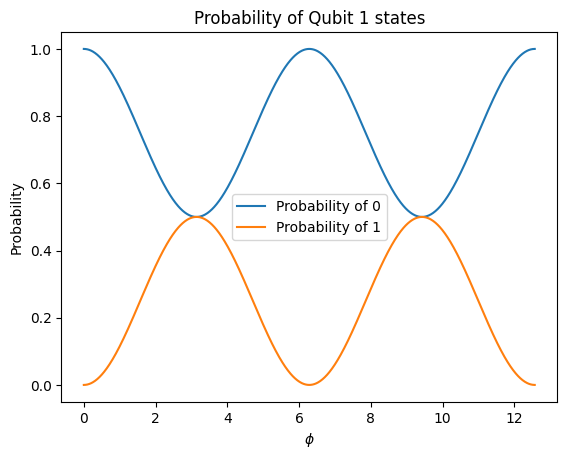

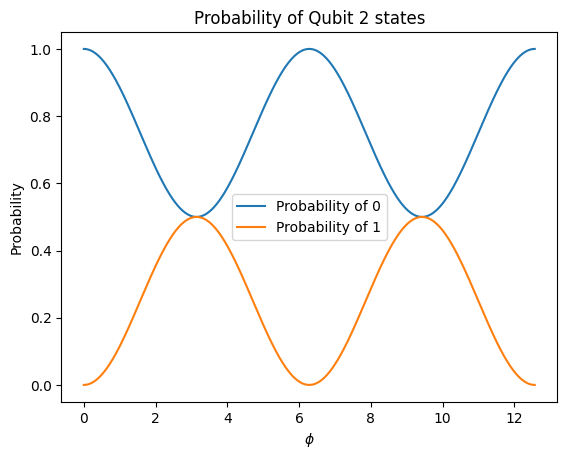

In [4]:
import matplotlib.pyplot as plt
plt.title("Probability of Qubit 1 states")
plt.plot(phi_list, P0_q1, label = "Probability of 0")
plt.plot(phi_list, P1_q1, label = "Probability of 1")
plt.xlabel(r"$\phi$")
plt.ylabel("Probability")
plt.legend()
plt.show()
plt.title("Probability of Qubit 2 states")
plt.plot(phi_list, P0_q2, label = "Probability of 0")
plt.plot(phi_list, P1_q2, label = "Probability of 1")
plt.xlabel(r"$\phi$")
plt.ylabel("Probability")
plt.legend()